### **Data Import, Augmentation and Preprocessing**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
from glob import glob
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential,load_model
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Input
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import DenseNet121,DenseNet201

In [3]:
#Train Dataset:
import os
dataset_path_train = os.listdir("/content/drive/MyDrive/plant_disease_dataset")
plant_types_train = os.listdir("/content/drive/MyDrive/plant_disease_dataset")
print (plant_types_train)  #what kinds of plants are in this dataset

print("Types of plants found: ", len(dataset_path_train))


['Tomato__Tomato_mosaic_virus', 'Tomato_Bacterial_spot', 'Tomato_Septoria_leaf_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato__Target_Spot', 'Tomato_Leaf_Mold', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_healthy', 'Potato___healthy', 'Potato___Early_blight', 'Pepper__bell___healthy', 'Potato___Late_blight', 'Pepper__bell___Bacterial_spot']
Types of plants found:  15


In [4]:
import os
import random 
path="/content/drive/MyDrive/plant_disease_dataset/"
files=os.listdir(path)
d=random.choice(files)
print(d)

Tomato__Target_Spot


In [ ]:
# #import the library opencv
# import cv2
# import glob
# from google.colab.patches import cv2_imshow

# #select the path
# path = "/content/drive/MyDrive/plant_disease_dataset/Potato___healthy/*.*"
# for file in glob.glob(path):
#     print(file)     #just stop here to see all file names printed
#     a= cv2.imread(file)  #now, we can read each file since we have the full path
#     # print(a)  #print numpy arrays for each file

# #let us look at each file
# #    cv2.imshow('Original Image', a)
# #    cv2.waitKey(0)
# #    cv2.destroyAllWindows()
    
# #process each image - change color from BGR to RGB.
#     c = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
#     # cv2.imshow(c)
#     cv2_imshow(c)
# #wait for 1 second
#     k = cv2.waitKey(0)
# #destroy the window
#     cv2.destroyAllWindows()

In [5]:
plants_train = []

for item in plant_types_train:
 # Get all the file names
 all_plants_train = all_plants_test = [i for i in os.listdir('/content/drive/MyDrive/plant_disease_dataset' + '/' +item) if i.endswith('.JPG' or '.jpg' or '.png' or '.PNG')]
#  all_plants_train = all_plants_test = [i for i in os.listdir('/content/gdrive/MyDrive/plant_disease_dataset' + '/' +item)]
 #print(all_shoes)

 # Add them to the list
 for plant in all_plants_train:
    plants_train.append((item, str('/content/drive/MyDrive/plant_disease_dataset' + '/' +item) + '/' + plant))
    print(plants_train[:1])

Streaming output truncated to the last 5000 lines.
[('Tomato__Tomato_mosaic_virus', '/content/drive/MyDrive/plant_disease_dataset/Tomato__Tomato_mosaic_virus/526f2f56-2290-422d-a454-d576aa72d466___PSU_CG 2057.JPG')]
[('Tomato__Tomato_mosaic_virus', '/content/drive/MyDrive/plant_disease_dataset/Tomato__Tomato_mosaic_virus/526f2f56-2290-422d-a454-d576aa72d466___PSU_CG 2057.JPG')]
[('Tomato__Tomato_mosaic_virus', '/content/drive/MyDrive/plant_disease_dataset/Tomato__Tomato_mosaic_virus/526f2f56-2290-422d-a454-d576aa72d466___PSU_CG 2057.JPG')]
[('Tomato__Tomato_mosaic_virus', '/content/drive/MyDrive/plant_disease_dataset/Tomato__Tomato_mosaic_virus/526f2f56-2290-422d-a454-d576aa72d466___PSU_CG 2057.JPG')]
[('Tomato__Tomato_mosaic_virus', '/content/drive/MyDrive/plant_disease_dataset/Tomato__Tomato_mosaic_virus/526f2f56-2290-422d-a454-d576aa72d466___PSU_CG 2057.JPG')]
[('Tomato__Tomato_mosaic_virus', '/content/drive/MyDrive/plant_disease_dataset/Tomato__Tomato_mosaic_virus/526f2f56-2290-422

In [6]:
# Build a dataframe        
plants_train_df = pd.DataFrame(data=plants_train, columns=['plant type', 'image'])
print(len(plants_train_df))
print(plants_train_df.head())
print(plants_train_df.tail())


20482
                    plant type  \
0  Tomato__Tomato_mosaic_virus   
1  Tomato__Tomato_mosaic_virus   
2  Tomato__Tomato_mosaic_virus   
3  Tomato__Tomato_mosaic_virus   
4  Tomato__Tomato_mosaic_virus   

                                               image  
0  /content/drive/MyDrive/plant_disease_dataset/T...  
1  /content/drive/MyDrive/plant_disease_dataset/T...  
2  /content/drive/MyDrive/plant_disease_dataset/T...  
3  /content/drive/MyDrive/plant_disease_dataset/T...  
4  /content/drive/MyDrive/plant_disease_dataset/T...  
                          plant type  \
20477  Pepper__bell___Bacterial_spot   
20478  Pepper__bell___Bacterial_spot   
20479  Pepper__bell___Bacterial_spot   
20480  Pepper__bell___Bacterial_spot   
20481  Pepper__bell___Bacterial_spot   

                                                   image  
20477  /content/drive/MyDrive/plant_disease_dataset/P...  
20478  /content/drive/MyDrive/plant_disease_dataset/P...  
20479  /content/drive/MyDrive/plant_disea

In [7]:
# Image Exploratory Analysis
import numpy as np
print("Total number of plants in the Train dataset before: ", len(plants_train_df))

plant_train_count_before = plants_train_df['plant type'].value_counts()

plants_train_df = plants_train_df[plants_train_df['plant type'].map(plants_train_df['plant type'].value_counts()) > 100]
col_list =  list(plants_train_df['plant type'])
print(col_list)
plant_train_type, counts = np.unique(col_list, return_counts=True)
plant_train_count = plants_train_df['plant type'].value_counts()
print("Total number of plants in the Train dataset after: ", len(plants_train_df))
# print(plants_train_df)
print("plants in each category: ")
print(plant_train_count)

Total number of plants in the Train dataset before:  20482
['Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__Tomato_mosaic_virus', 'Tomato__T

In [8]:
print(plant_train_type)

['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


### **Image Preprocessing**

In [9]:
import cv2
path_train = '/content/drive/MyDrive/plant_disease_dataset'


im_size = 64 

images = []
labels = []

for i in plant_train_type:
    data_path_train = path_train + '/'+ str(i)  # entered in 1st folder and then 2nd folder and then 3rd folder
    print(data_path_train)
    filenames = [i for i in os.listdir(data_path_train) if i.endswith('.JPG' or '.jpg' or '.png' or '.PNG')]
    # filenames = [i for i in os.listdir(data_path_train)]
    print(filenames)  # will get the names of all images which ends with .jpg extension
    for f in filenames:
        img = cv2.imread(data_path_train + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

/content/drive/MyDrive/plant_disease_dataset/Pepper__bell___Bacterial_spot
['018e494e-d2eb-468b-9d02-40219d9f4921___JR_B.Spot 9045.JPG', '0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Spot 8964.JPG', '006adb74-934f-448f-a14f-62181742127b___JR_B.Spot 3395.JPG', '00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Spot 3132.JPG', '01940b6d-7dea-4889-a7b8-a35f4e9bba34___NREC_B.Spot 9120.JPG', '01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Spot 3262.JPG', '0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B.Spot 9169.JPG', '055a84c4-8286-4b44-816a-66b82d3bd4bc___NREC_B.Spot 9105.JPG', '08485974-1e38-4e34-b296-fadd9cc26942___NREC_B.Spot 9193.JPG', '0a0dbf1f-1131-496f-b337-169ec6693e6f___NREC_B.Spot 9241.JPG', '024623ab-be81-4d99-a653-c3be1495ce8e___JR_B.Spot 8889.JPG', '0bd0f439-013b-40ed-a6d1-4e67e971d437___JR_B.Spot 3272.JPG', '0a4c007d-41ab-4659-99cb-8a4ae4d07a55___NREC_B.Spot 1954.JPG', '0b27c03f-b3bc-4d96-9b76-6fbd779404b9___NREC_B.Spot 1799.JPG', '09035eae-2a1c-4718-8877-5270a1fe8462___JR_B.Spot 3280.J

In [10]:
# Transform the image array to a numpy type

images = np.array(images) # Converting List into array

images.shape

(20482, 64, 64, 3)

In [11]:
images = images.astype('float32') / 255.0

In [12]:
images.shape

(20482, 64, 64, 3)

### **Label Encoding - Images**

In [13]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=plants_train_df['plant type'].values
print(y[:5])

['Tomato__Tomato_mosaic_virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato__Tomato_mosaic_virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato__Tomato_mosaic_virus']


In [14]:
# for y
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform (y)
print(len(y))
print (y)

20482
[13 13 13 ...  0  0  0]


In [15]:
y=y.reshape(-1,1)
print(y)

[[13]
 [13]
 [13]
 ...
 [ 0]
 [ 0]
 [ 0]]


In [16]:
onehotencoder = OneHotEncoder(sparse=False)  
Y= onehotencoder.fit_transform(y)
Y.shape  

(20482, 15)

### **Train-Test Split**

In [17]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)

X_train, X_val, Y_train, Y_val = train_test_split(images, Y, test_size=0.2, random_state=100)

In [18]:
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(16385, 64, 64, 3)
(4097, 64, 64, 3)
(16385, 15)
(4097, 15)


In [19]:
print(Y_val)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


### **Model 1-DenseNet121**

In [24]:
EPOCHS = 200 
BATCH_SIZE = 64
SIZE=64
N_ch=3

In [25]:
#using DenseNet121 Model
def build_densenet():
    densenet = DenseNet121(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), activation='relu',padding='same')(input) # 1st Layer    
    x = densenet(x)    # 121 Layers - 122nd
    x = GlobalAveragePooling2D()(x)  #123rd layer
    # x = BatchNormalization()(x)
    # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)
    # x = Dropout(0.2)(x)

    # x = Conv2D(32, (5, 5), activation='relu',padding='same')(x)
    # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)  
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    # x = Conv2D(64, (5, 5), activation='relu',padding='same')(x)  
    # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x)
    # x = BatchNormalization()(x)    
    # x = Dropout(0.2)(x)

    # x = Conv2D(64, (5, 5), activation='relu',padding='same')(x) 
    # x = MaxPooling2D(pool_size=(2, 2),padding='same')(x) 
    # x = BatchNormalization()(x)    
    # x = Dropout(0.2)(x)
    
    x = Flatten()(x)
    x = Dense(512, activation='relu')(x)
    # x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)
    # x = Dropout(0.2)(x)
    output = Dense(15, activation='softmax',name='densenet_')(x)

    # multi output
    # output = Dense(10,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    # optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    optimizer = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [27]:
# augumenting the data and then fitting the model- (2 hours training time)
model = build_densenet()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('densenet121_model.h5', verbose=1, save_best_only=True)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=270, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 3)         84        
                                                                 
 densenet121 (Functional)    (None, None, None, 1024)  7037504   
                                                                 
 global_average_pooling2d_1   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0   

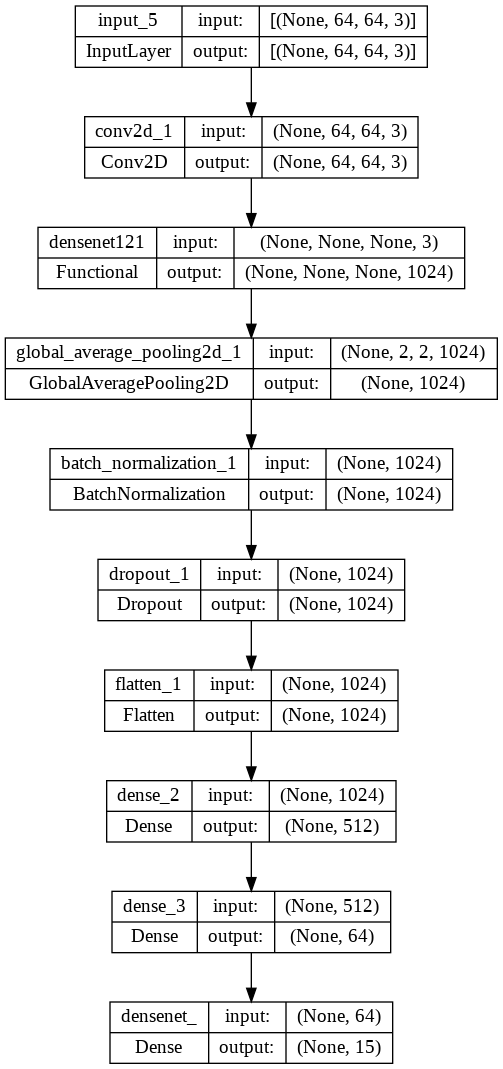

In [28]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

In [29]:
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint],
              #  callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

<ipython-input-29-209873a90747>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),


Epoch 1/50

Epoch 1: val_loss improved from inf to 7.23979, saving model to densenet121_model.h5
256/256 - 60s - loss: 1.5114 - accuracy: 0.4753 - val_loss: 7.2398 - val_accuracy: 0.2629 - lr: 0.0010 - 60s/epoch - 236ms/step
Epoch 2/50

Epoch 2: val_loss improved from 7.23979 to 1.45199, saving model to densenet121_model.h5
256/256 - 33s - loss: 1.0729 - accuracy: 0.5897 - val_loss: 1.4520 - val_accuracy: 0.5306 - lr: 0.0010 - 33s/epoch - 130ms/step
Epoch 3/50

Epoch 3: val_loss improved from 1.45199 to 1.39823, saving model to densenet121_model.h5
256/256 - 31s - loss: 0.9395 - accuracy: 0.6236 - val_loss: 1.3982 - val_accuracy: 0.5167 - lr: 0.0010 - 31s/epoch - 121ms/step
Epoch 4/50

Epoch 4: val_loss improved from 1.39823 to 1.34293, saving model to densenet121_model.h5
256/256 - 31s - loss: 0.8826 - accuracy: 0.6361 - val_loss: 1.3429 - val_accuracy: 0.5668 - lr: 0.0010 - 31s/epoch - 122ms/step
Epoch 5/50

Epoch 5: val_loss improved from 1.34293 to 1.20492, saving model to densenet

In [30]:
# computing the final loss and accuracy
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

129/129 [==============================] - 2s 18ms/step - loss: 2.4535 - accuracy: 0.4738
Final Loss: 2.4535298347473145, Final Accuracy: 0.47376129031181335


129/129 [==============================] - 4s 16ms/step


Text(0.5, 144.41374999999996, 'Predicted')

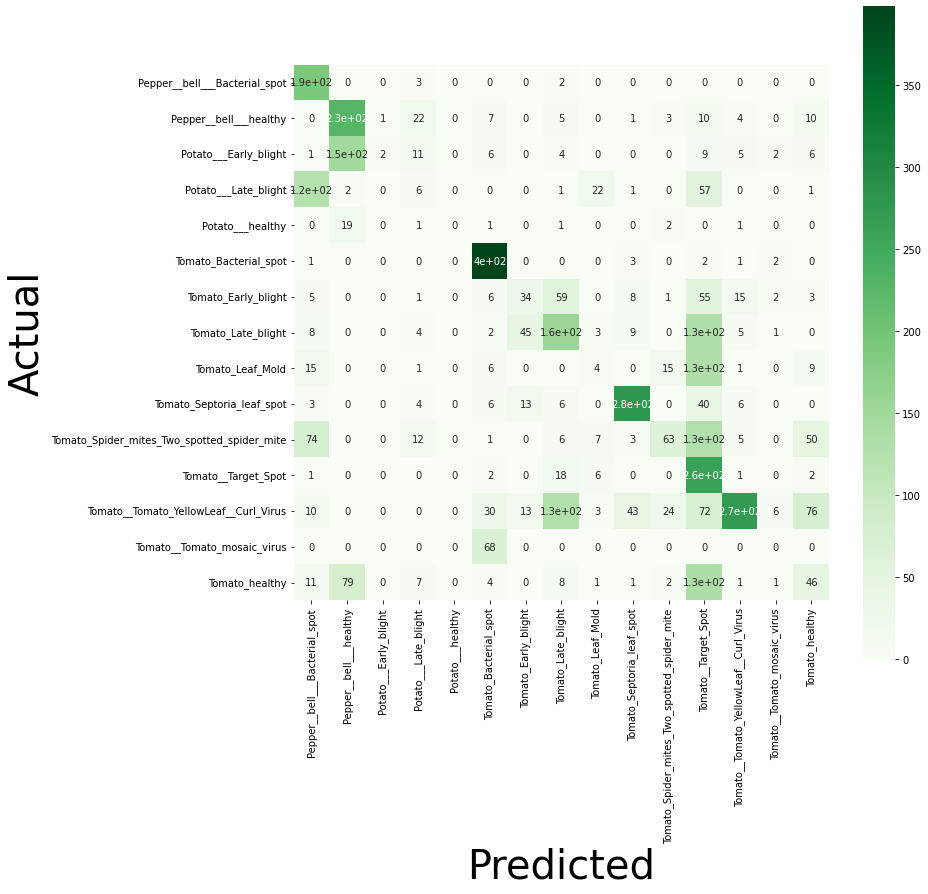

In [31]:
#Findong and plotting the confusion matrix
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=plant_train_type, yticklabels=plant_train_type)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [32]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred, target_names=plant_train_type))

                                             precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.43      0.97      0.59       195
                     Pepper__bell___healthy       0.48      0.78      0.59       290
                      Potato___Early_blight       0.67      0.01      0.02       194
                       Potato___Late_blight       0.08      0.03      0.04       215
                           Potato___healthy       0.00      0.00      0.00        25
                      Tomato_Bacterial_spot       0.74      0.98      0.84       407
                        Tomato_Early_blight       0.32      0.18      0.23       189
                         Tomato_Late_blight       0.40      0.43      0.41       364
                           Tomato_Leaf_Mold       0.09      0.02      0.04       181
                  Tomato_Septoria_leaf_spot       0.80      0.78      0.79       356
Tomato_Spider_mites_Two_spotted_spider_mite       0.57      0.18

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


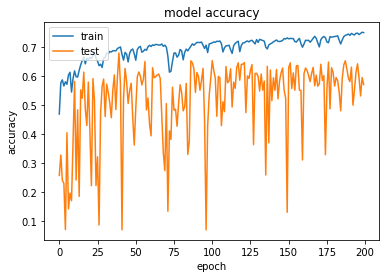

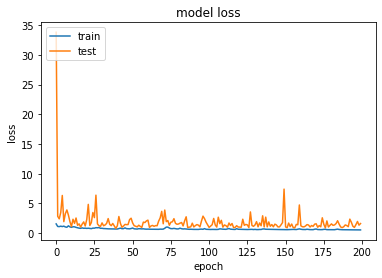

In [ ]:
# plotting accuracy and loss curves
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 1s 753ms/step
[0.04811577 0.07546408 0.00639643 0.0049398  0.0318134  0.02421796
 0.05553897 0.74494606 0.00704137 0.00152615]


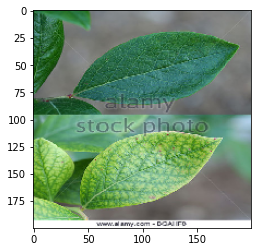

Prediction: Tomato Septoria leaf spot


In [ ]:
# making prediction from an image
from skimage import io
from tensorflow.keras.utils import load_img, img_to_array 
# from keras.utils  import image
img = load_img('/content/gdrive/MyDrive/PlantDoc-Dataset-master/PlantDoc-Dataset-master/test/Blueberry leaf/blueberry-leaves-normal-above-and-iron-deficient-below-bgahf8.jpg', grayscale=False, target_size=(64, 64))
show_img=load_img('/content/gdrive/MyDrive/PlantDoc-Dataset-master/PlantDoc-Dataset-master/test/Blueberry leaf/blueberry-leaves-normal-above-and-iron-deficient-below-bgahf8.jpg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255

custom = model.predict(x)
print(custom[0])

plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',plant_train_type[ind])

### **Model 2 - ResNet50**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cv2
import os
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.models import Model,Sequential,load_model
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Input
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D, MaxPooling2D

# from keras.models import Model,Sequential, Input, load_model
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
EPOCHS = 200
SIZE=64
N_ch=3

In [ ]:
def build_resnet50():
    resnet50 = ResNet50(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    
    x = resnet50(x)
    
    # x = GlobalAveragePooling2D()(x)
    # # x= Flatten()(x)
    # # x = GlobalAveragePooling2D()(x)
    # # x = MaxPooling2D()(x)
    # x = BatchNormalization()(x)
    # x = Dropout(0.5)(x)
    # # x = Dense(2048, activation='relu')(x)
    # x = Dense(1024, activation='relu')(x)
    # # x = MaxPooling2D()(x)
    # x = BatchNormalization()(x)
    # x = Dropout(0.5)(x)
    # x = Dense(256, activation='relu')(x)
    # x = BatchNormalization()(x)
    # x = Dropout(0.5)(x)


    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    # x = Dense(512, activation='Leakyrelu')(x)
    # x = BatchNormalization()(x)
    # x = Dropout(0.5)(x)
    x = Dense(256, activation='LeakyReLU')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(15,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    # optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    optimizer = Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [ ]:
model = build_resnet50()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.70, patience=5, verbose=1, min_lr=1e-4)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=360,# Degree range for random rotations
                        # width_shift_range=0.2, # Range for random horizontal shifts
                        # height_shift_range=0.2, # Range for random vertical shifts
                        # zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)

94765736/94765736 [==============================] - 1s 0us/step
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 3)         84        
                                                                 
 resnet50 (Functional)       (None, None, None, 2048)  23587712  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_2 (Batc  (None, 2048)             8192      
 hNormalization)                                                 
                                                            

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


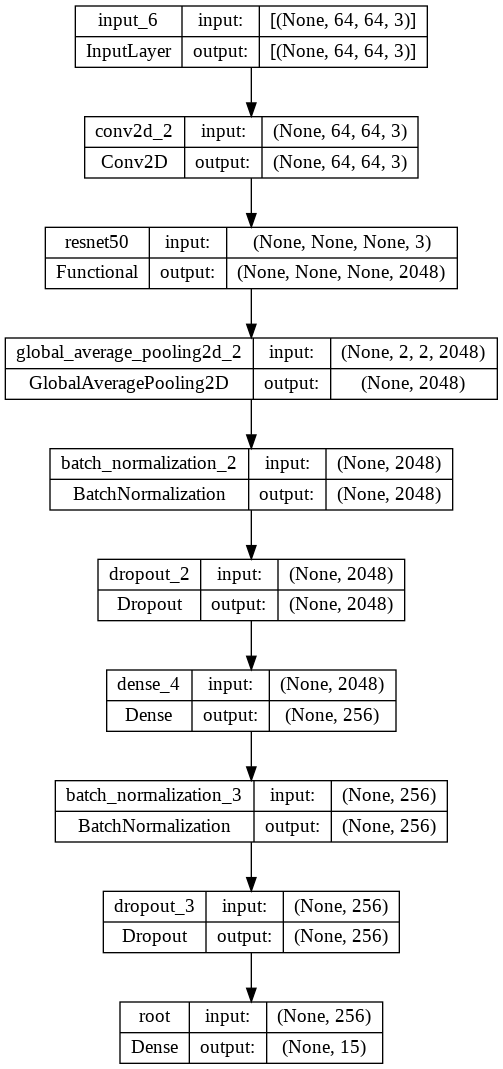

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png') 

In [ ]:
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               callbacks=[annealer, checkpoint],
              #  callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

<ipython-input-66-4f8dc69b4799>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),


Epoch 1/200
256/256 [==============================] - ETA: 0s - loss: 2.4900 - accuracy: 0.3154
Epoch 1: val_loss improved from inf to 85.66944, saving model to model.h5
256/256 [==============================] - 41s 123ms/step - loss: 2.4900 - accuracy: 0.3154 - val_loss: 85.6694 - val_accuracy: 0.0993 - lr: 1.0000e-04
Epoch 2/200
256/256 [==============================] - ETA: 0s - loss: 1.5121 - accuracy: 0.4994
Epoch 2: val_loss improved from 85.66944 to 35.06851, saving model to model.h5
256/256 [==============================] - 32s 126ms/step - loss: 1.5121 - accuracy: 0.4994 - val_loss: 35.0685 - val_accuracy: 0.0476 - lr: 1.0000e-04
Epoch 3/200
256/256 [==============================] - ETA: 0s - loss: 1.2340 - accuracy: 0.5574
Epoch 3: val_loss improved from 35.06851 to 8.89499, saving model to model.h5
256/256 [==============================] - 31s 119ms/step - loss: 1.2340 - accuracy: 0.5574 - val_loss: 8.8950 - val_accuracy: 0.0525 - lr: 1.0000e-04
Epoch 4/200
256/256 [==

In [ ]:
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

129/129 [==============================] - 3s 26ms/step - loss: 1.7154 - accuracy: 0.6546
Final Loss: 1.7153838872909546, Final Accuracy: 0.6546253561973572


129/129 [==============================] - 6s 24ms/step


Text(0.5, 144.41374999999996, 'Predicted')

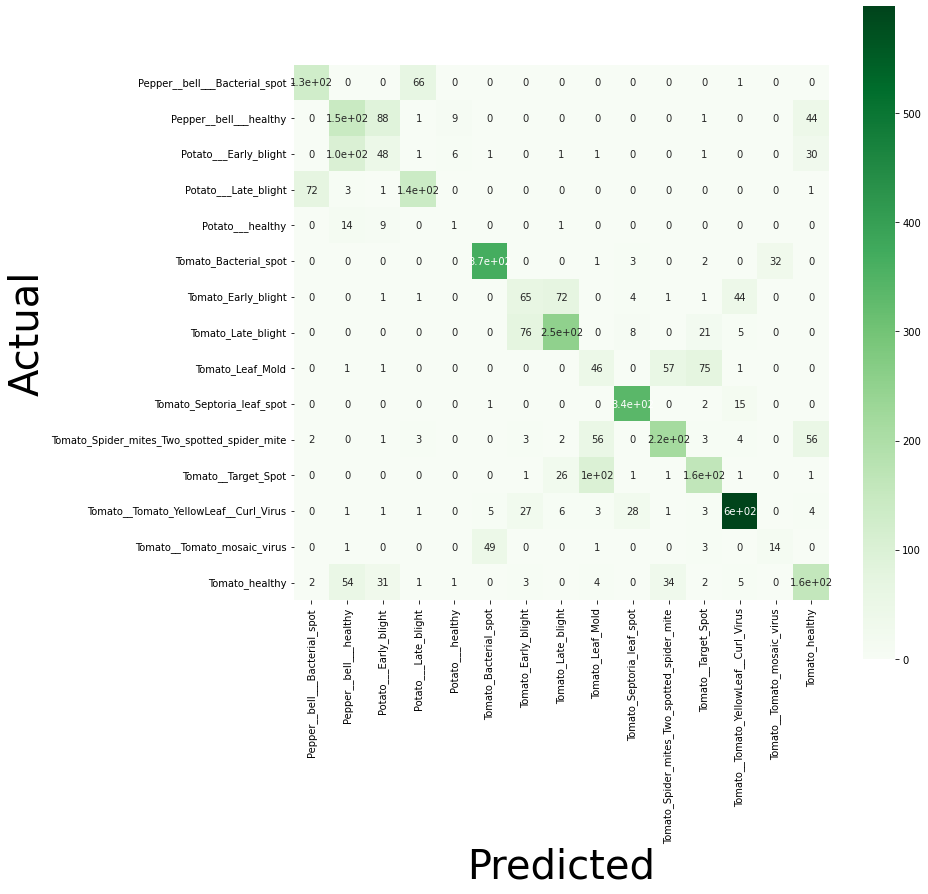

In [ ]:
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=plant_train_type, yticklabels=plant_train_type)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred, target_names=plant_train_type))

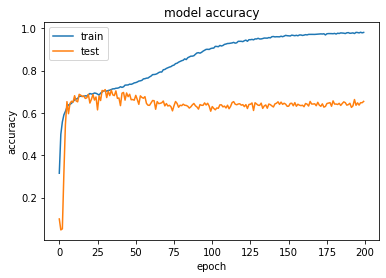

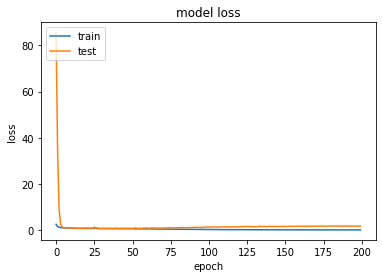

In [ ]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# making prediction from an image
from skimage import io
from tensorflow.keras.utils import load_img, img_to_array 
# from keras.utils  import image
img = load_img('/content/gdrive/MyDrive/PlantDoc-Dataset-master/PlantDoc-Dataset-master/test/Blueberry leaf/blueberry-leaves-normal-above-and-iron-deficient-below-bgahf8.jpg', grayscale=False, target_size=(64, 64))
show_img=load_img('/content/gdrive/MyDrive/PlantDoc-Dataset-master/PlantDoc-Dataset-master/test/Blueberry leaf/blueberry-leaves-normal-above-and-iron-deficient-below-bgahf8.jpg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255

custom = model.predict(x)
print(custom[0])

plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',plant_train_type[ind])

### **Model 3 - CNN's**

In [ ]:
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Dense
from keras.layers import Input
from keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from keras.layers import LeakyReLU
from keras.layers import BatchNormalization

In [ ]:
# def conv_layer (filterx) :
    
#     model = Sequential()
    
#     model.add(Conv2D(filterx, (3,3), padding = 'same', kernel_regularizer = 'l2'))
#     model.add(BatchNormalization())
#     model.add(Dropout(.2))
#     model.add(LeakyReLU())
#     model.add(MaxPooling2D((2, 2)))
    
#     return model

# def dens_layer (hiddenx) :
    
#     model = Sequential()
    
#     model.add(Dense(hiddenx, kernel_regularizer = 'l2'))
#     model.add(BatchNormalization())
#     model.add(Dropout(.2))
#     model.add(LeakyReLU())
    
#     return model

In [ ]:
# def cnn (filter1, filter2, hidden1, hidden2) :
    
#     model = Sequential([
        
#         Input((256,256,1,)),
#         conv_layer(filter1),
#         conv_layer(filter2),
#         Flatten(),
#         dens_layer(hidden1),
#         dens_layer(hidden2),
        
#         Dense(15, activation = 'softmax')
#     ])
    
#     model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.0005), metrics = ['accuracy'])
#     return model

In [ ]:
# model = cnn(2**3,
#             2**3,
#             2**6,
#             2**5)

In [ ]:
# print(model.summary())

In [ ]:
# from keras.callbacks import ModelCheckpoint

In [ ]:
def build_cnn():
    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)    
    # x = GlobalAveragePooling2D()(x)
    # # x= Flatten()(x)
    # # x = GlobalAveragePooling2D()(x)
    # # x = MaxPooling2D()(x)
    # x = BatchNormalization()(x)
    # x = Dropout(0.5)(x)
    # # x = Dense(2048, activation='relu')(x)
    # x = Dense(1024, activation='relu')(x)
    # # x = MaxPooling2D()(x)
    # x = BatchNormalization()(x)
    # x = Dropout(0.5)(x)
    # x = Dense(256, activation='relu')(x)
    # x = BatchNormalization()(x)
    # x = Dropout(0.5)(x)


    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(2048, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(1024, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dense(512, activation='LeakyReLU')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='LeakyReLU')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(15,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    # optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    optimizer = Adam(lr=0.0001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [ ]:
model = build_cnn()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.70, patience=5, verbose=1, min_lr=1e-4)
checkpoint = ModelCheckpoint('model_cnn.h5', verbose=1, save_best_only=True)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=360,# Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1443 (Conv2D)        (None, 64, 64, 3)         84        
                                                                 
 global_average_pooling2d_3   (None, 3)                0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_1444 (B  (None, 3)                12        
 atchNormalization)                                              
                                                                 
 dropout_13 (Dropout)        (None, 3)                 0         
                                                                 
 dense_11 (Dense)            (None, 2048)              8192

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


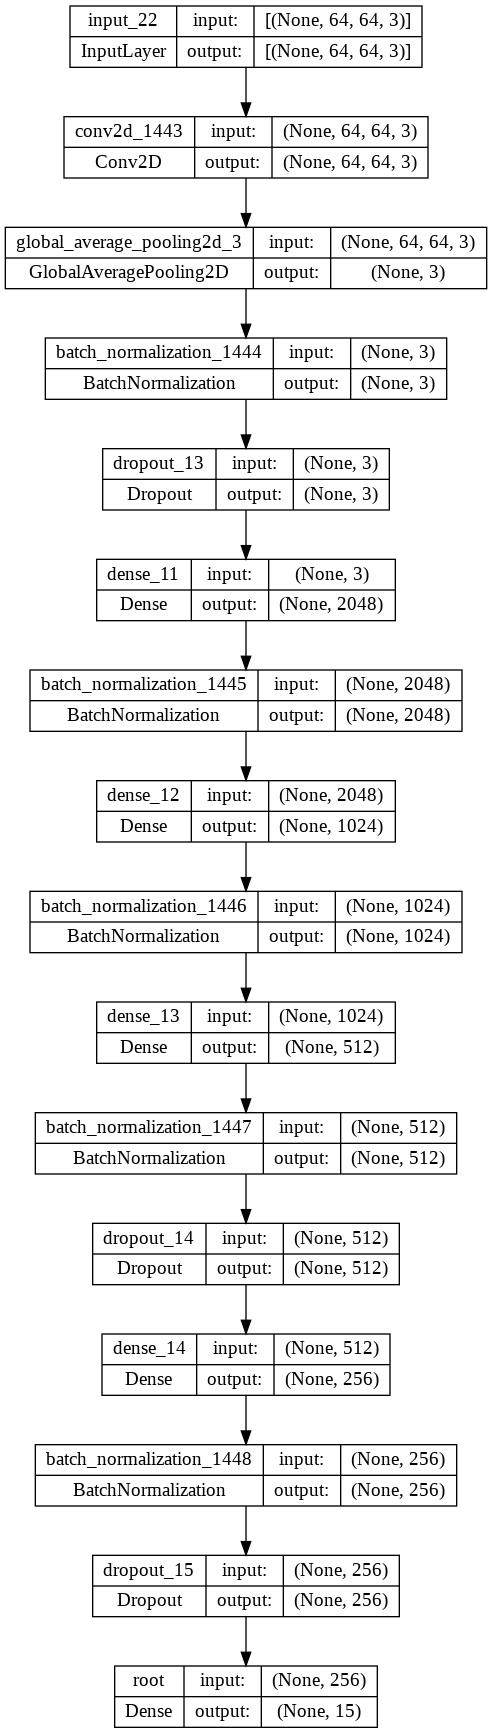

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='cnn.jpg', show_shapes=True,show_layer_names=True)
Image(filename='cnn.jpg') 

In [ ]:
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=1,
               callbacks=[annealer, checkpoint],
              #  callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

Epoch 1/200


<ipython-input-78-4f8dc69b4799>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),


511/512 [============================>.] - ETA: 0s - loss: 3.4132 - accuracy: 0.1208
Epoch 1: val_loss improved from inf to 2.57866, saving model to model_cnn.h5
512/512 [==============================] - 24s 45ms/step - loss: 3.4122 - accuracy: 0.1209 - val_loss: 2.5787 - val_accuracy: 0.1833 - lr: 1.0000e-04
Epoch 2/200
511/512 [============================>.] - ETA: 0s - loss: 3.1666 - accuracy: 0.1339
Epoch 2: val_loss improved from 2.57866 to 2.30488, saving model to model_cnn.h5
512/512 [==============================] - 22s 44ms/step - loss: 3.1666 - accuracy: 0.1339 - val_loss: 2.3049 - val_accuracy: 0.2575 - lr: 1.0000e-04
Epoch 3/200
511/512 [============================>.] - ETA: 0s - loss: 3.0154 - accuracy: 0.1399
Epoch 3: val_loss did not improve from 2.30488
512/512 [==============================] - 24s 46ms/step - loss: 3.0163 - accuracy: 0.1397 - val_loss: 2.3274 - val_accuracy: 0.2329 - lr: 1.0000e-04
Epoch 4/200
512/512 [==============================] - ETA: 0s - l

In [ ]:
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

In [ ]:
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=plant_train_type, yticklabels=plant_train_type)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred, target_names=plant_train_type))

In [ ]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# making prediction from an image
from skimage import io
from tensorflow.keras.utils import load_img, img_to_array 
# from keras.utils  import image
img = load_img('/content/gdrive/MyDrive/PlantDoc-Dataset-master/PlantDoc-Dataset-master/test/Blueberry leaf/blueberry-leaves-normal-above-and-iron-deficient-below-bgahf8.jpg', grayscale=False, target_size=(64, 64))
show_img=load_img('/content/gdrive/MyDrive/PlantDoc-Dataset-master/PlantDoc-Dataset-master/test/Blueberry leaf/blueberry-leaves-normal-above-and-iron-deficient-below-bgahf8.jpg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255

custom = model.predict(x)
print(custom[0])

plt.imshow(show_img)
plt.show()

a=custom[0]
ind=np.argmax(a)
        
print('Prediction:',plant_train_type[ind])

### **Model 4 - Xception**

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
# import cv2
# import os
# from tqdm import tqdm
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split
# from keras.utils.np_utils import to_categorical
# from keras.models import Model,Sequential, Input, load_model
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
# from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.applications import Xception


In [ ]:
EPOCHS = 200
SIZE=64
N_ch=3
BATCH_SIZE = 32

In [ ]:
def build_xception():
    xception = Xception(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    
    x = xception(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(15,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [ ]:
model = build_xception()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('xception.h5', verbose=1, save_best_only=True)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=360, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=100,
               verbose=2,
               callbacks=[annealer, checkpoint],
               validation_data=(X_val, Y_val))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_18 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1437 (Conv2D)        (None, 64, 64, 3)         84        
                                                                 
 xception (Functional)       (None, None, None, 2048)  20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_1431 (B  (None, 2048)             8192      
 atchNormalization)                                              
                                                                 
 dropout_2 (Dropout)         (None, 2048)              0   

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100


<ipython-input-42-f21d9dbcff35>:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),



Epoch 1: val_loss improved from inf to 2.44314, saving model to xception.h5
512/512 - 41s - loss: 3.2643 - accuracy: 0.1170 - val_loss: 2.4431 - val_accuracy: 0.2477 - lr: 0.0020 - 41s/epoch - 80ms/step
Epoch 2/100

Epoch 2: val_loss did not improve from 2.44314
512/512 - 33s - loss: 2.2365 - accuracy: 0.3302 - val_loss: 2.8842 - val_accuracy: 0.2970 - lr: 0.0020 - 33s/epoch - 64ms/step
Epoch 3/100

Epoch 3: val_loss improved from 2.44314 to 1.31513, saving model to xception.h5
512/512 - 34s - loss: 1.5769 - accuracy: 0.4820 - val_loss: 1.3151 - val_accuracy: 0.5494 - lr: 0.0020 - 34s/epoch - 67ms/step
Epoch 4/100

Epoch 4: val_loss improved from 1.31513 to 1.17684, saving model to xception.h5
512/512 - 34s - loss: 1.2871 - accuracy: 0.5471 - val_loss: 1.1768 - val_accuracy: 0.5621 - lr: 0.0020 - 34s/epoch - 67ms/step
Epoch 5/100

Epoch 5: val_loss improved from 1.17684 to 1.06999, saving model to xception.h5
512/512 - 33s - loss: 1.1274 - accuracy: 0.5840 - val_loss: 1.0700 - val_acc

In [ ]:
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

129/129 [==============================] - 2s 19ms/step - loss: 0.7214 - accuracy: 0.6939
Final Loss: 0.7213584780693054, Final Accuracy: 0.6939224004745483


129/129 [==============================] - 3s 20ms/step


Text(0.5, 144.41374999999996, 'Predicted')

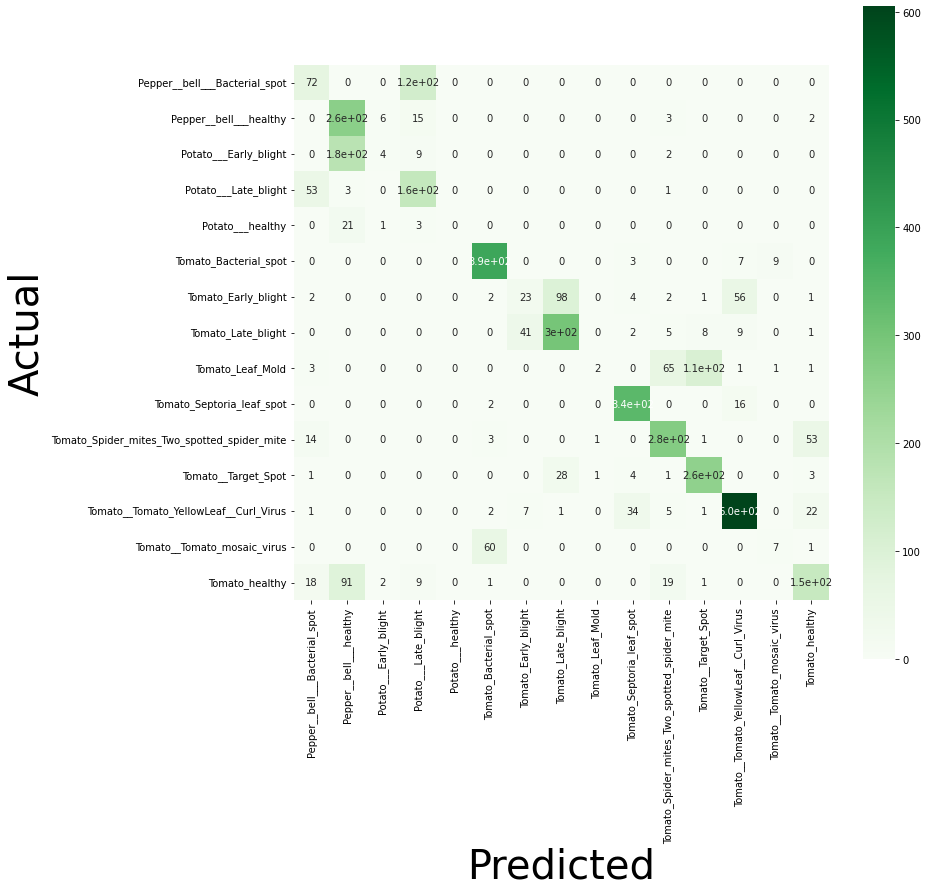

In [ ]:
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=plant_train_type, yticklabels=plant_train_type)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred, target_names=plant_train_type))

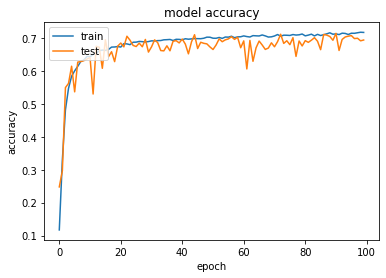

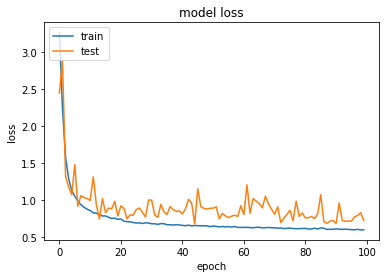

In [ ]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# making prediction from an image
from skimage import io
from tensorflow.keras.utils import load_img, img_to_array 
# from keras.utils  import image
img = load_img('/content/gdrive/MyDrive/PlantDoc-Dataset-master/PlantDoc-Dataset-master/test/Blueberry leaf/blueberry-leaves-normal-above-and-iron-deficient-below-bgahf8.jpg', grayscale=False, target_size=(64, 64))
show_img=load_img('/content/gdrive/MyDrive/PlantDoc-Dataset-master/PlantDoc-Dataset-master/test/Blueberry leaf/blueberry-leaves-normal-above-and-iron-deficient-below-bgahf8.jpg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255
custom = model.predict(x)
print(custom[0])
plt.imshow(show_img)
plt.show()
a=custom[0]
ind=np.argmax(a)        
print('Prediction:',plant_train_type[ind])

### **Model 5 - MobileNetV2**

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# %matplotlib inline
# import seaborn as sns
# import cv2
# import os
# from tqdm import tqdm
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import train_test_split
# from keras.utils.np_utils import to_categorical
# from keras.models import Model,Sequential, Input, load_model
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, AveragePooling2D, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.applications import MobileNetV2

In [ ]:
EPOCHS = 200
SIZE=64
N_ch=3

In [ ]:
def build_mobilenet():
    mobile = MobileNetV2(weights='imagenet', include_top=False)

    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), padding='same')(input)
    
    x = mobile(x)
    
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)

    # multi output
    output = Dense(15,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    optimizer = Adam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [ ]:
model = build_mobilenet()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('MobileNetV2.h5', verbose=1, save_best_only=True)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=360, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint],
               validation_data=(X_val, Y_val))

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 64, 64, 3)         84        
                                                                 
 mobilenetv2_1.00_224 (Funct  (None, None, None, 1280)  2257984  
 ional)                                                          
                                                                 
 global_average_pooling2d_4   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_6 (Batc  (None, 1280)             5120      
 hNormalization)                                                 
                                                           

<ipython-input-75-1e318dabfd39>:14: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),



Epoch 1: val_loss improved from inf to 6.24119, saving model to MobileNetV2.h5
256/256 - 29s - loss: 3.1850 - accuracy: 0.1705 - val_loss: 6.2412 - val_accuracy: 0.1057 - lr: 0.0020 - 29s/epoch - 112ms/step
Epoch 2/200

Epoch 2: val_loss did not improve from 6.24119
256/256 - 21s - loss: 2.1214 - accuracy: 0.3508 - val_loss: 8.9329 - val_accuracy: 0.0910 - lr: 0.0020 - 21s/epoch - 82ms/step
Epoch 3/200

Epoch 3: val_loss improved from 6.24119 to 4.51971, saving model to MobileNetV2.h5
256/256 - 22s - loss: 1.7106 - accuracy: 0.4351 - val_loss: 4.5197 - val_accuracy: 0.2316 - lr: 0.0020 - 22s/epoch - 84ms/step
Epoch 4/200

Epoch 4: val_loss did not improve from 4.51971
256/256 - 24s - loss: 1.4580 - accuracy: 0.4907 - val_loss: 4.6331 - val_accuracy: 0.2277 - lr: 0.0020 - 24s/epoch - 95ms/step
Epoch 5/200

Epoch 5: val_loss improved from 4.51971 to 3.38159, saving model to MobileNetV2.h5
256/256 - 21s - loss: 1.3273 - accuracy: 0.5263 - val_loss: 3.3816 - val_accuracy: 0.3083 - lr: 0.0

In [ ]:
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

In [ ]:
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=disease_types, yticklabels=disease_types)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:

from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred, target_names=plant_train_type))

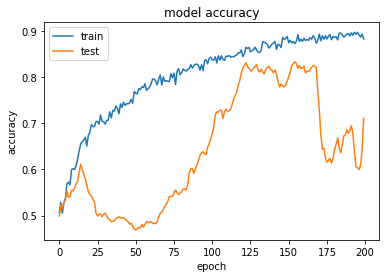

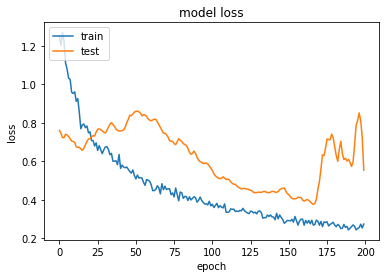

In [ ]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### **Model 6 - DenseNet201**

In [ ]:
#using DenseNet201 Model
def build_densenet201():
    densenet = DenseNet201(weights='imagenet', include_top=False)
    input = Input(shape=(SIZE, SIZE, N_ch))
    x = Conv2D(3, (3, 3), activation='relu',padding='same')(input)    
    x = densenet(x) 
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    # x = Dense(512, activation='Leakyrelu')(x)
    # x = BatchNormalization()(x)
    # x = Dropout(0.5)(x)
    x = Dense(256, activation='LeakyReLU')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.5)(x)
    
    #multi output
    output = Dense(15,activation = 'softmax', name='root')(x)
 

    # model
    model = Model(input,output)
    
    optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=0.1, decay=0.0)
    # optimizer = Adam(lr=0.001)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    model.summary()
    
    return model

In [ ]:
# augumenting the data and then fitting the model- (2 hours training time)
model = build_densenet201()
annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
checkpoint = ModelCheckpoint('model.h5', verbose=1, save_best_only=True)
# Generates batches of image data with data augmentation
datagen = ImageDataGenerator(rotation_range=270, # Degree range for random rotations
                        width_shift_range=0.2, # Range for random horizontal shifts
                        height_shift_range=0.2, # Range for random vertical shifts
                        zoom_range=0.2, # Range for random zoom
                        horizontal_flip=True, # Randomly flip inputs horizontally
                        vertical_flip=True) # Randomly flip inputs vertically

datagen.fit(X_train)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 3)         84        
                                                                 
 densenet201 (Functional)    (None, None, None, 1920)  18321984  
                                                                 
 global_average_pooling2d_3   (None, 1920)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 batch_normalization_2 (Batc  (None, 1920)             7680      
 hNormalization)                                                 
                                                                 
 dropout_2 (Dropout)         (None, 1920)              0   

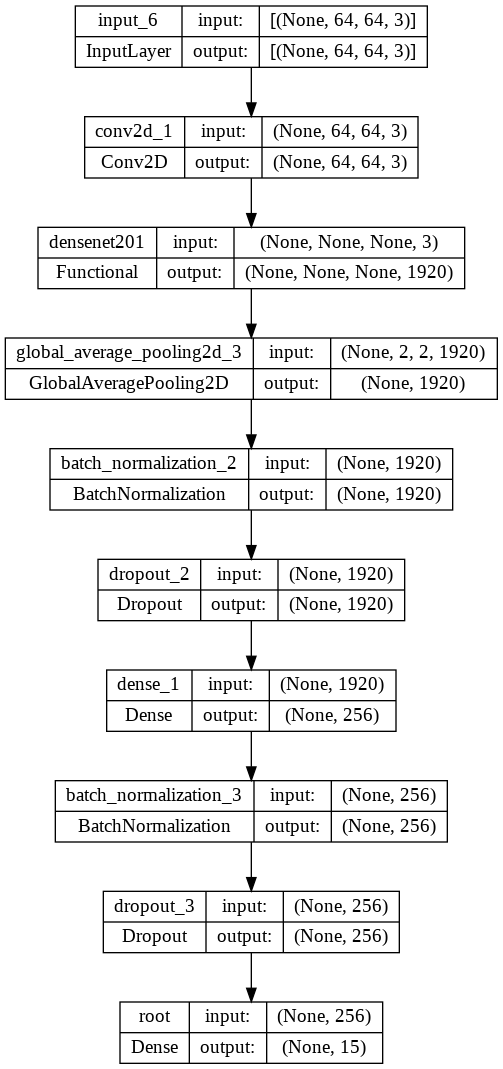

In [ ]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(model, to_file='convnet_201.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet_201.png') 

In [ ]:
# Fits the model on batches with real-time data augmentation
hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),
               steps_per_epoch=X_train.shape[0] // BATCH_SIZE,
               epochs=EPOCHS,
               verbose=2,
               callbacks=[annealer, checkpoint],
              #  callbacks=[checkpoint],
               validation_data=(X_val, Y_val))

<ipython-input-38-209873a90747>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=BATCH_SIZE),


Epoch 1/200

Epoch 1: val_loss improved from inf to 4.88714, saving model to model.h5
256/256 - 84s - loss: 2.9032 - accuracy: 0.2466 - val_loss: 4.8871 - val_accuracy: 0.1482 - lr: 0.0010 - 84s/epoch - 329ms/step
Epoch 2/200

Epoch 2: val_loss improved from 4.88714 to 1.49365, saving model to model.h5
256/256 - 41s - loss: 1.6817 - accuracy: 0.4714 - val_loss: 1.4936 - val_accuracy: 0.5182 - lr: 0.0010 - 41s/epoch - 162ms/step
Epoch 3/200

Epoch 3: val_loss improved from 1.49365 to 1.25947, saving model to model.h5
256/256 - 41s - loss: 1.3274 - accuracy: 0.5396 - val_loss: 1.2595 - val_accuracy: 0.5719 - lr: 0.0010 - 41s/epoch - 161ms/step
Epoch 4/200

Epoch 4: val_loss did not improve from 1.25947
256/256 - 39s - loss: 1.1734 - accuracy: 0.5732 - val_loss: 1.3432 - val_accuracy: 0.5585 - lr: 0.0010 - 39s/epoch - 154ms/step
Epoch 5/200

Epoch 5: val_loss improved from 1.25947 to 1.20767, saving model to model.h5
256/256 - 42s - loss: 1.0564 - accuracy: 0.5971 - val_loss: 1.2077 - val

In [ ]:
# computing the final loss and accuracy
#model = load_model('../output/kaggle/working/model.h5')
final_loss, final_accuracy = model.evaluate(X_val, Y_val)
print('Final Loss: {}, Final Accuracy: {}'.format(final_loss, final_accuracy))

In [ ]:
#Findong and plotting the confusion matrix
Y_pred = model.predict(X_val)

Y_pred = np.argmax(Y_pred, axis=1)
Y_true = np.argmax(Y_val, axis=1)

cm = confusion_matrix(Y_true, Y_pred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap=plt.cm.Greens, annot=True, square=True, xticklabels=plant_train_type, yticklabels=plant_train_type)
ax.set_ylabel('Actual', fontsize=40)
ax.set_xlabel('Predicted', fontsize=40)

In [ ]:

from sklearn.metrics import classification_report

print(classification_report(Y_true, Y_pred, target_names=plant_train_type))

In [ ]:
# accuracy plot 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# loss plot
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# making prediction from an image
from skimage import io
from tensorflow.keras.utils import load_img, img_to_array 
# from keras.utils  import image
img = load_img('/content/gdrive/MyDrive/PlantDoc-Dataset-master/PlantDoc-Dataset-master/test/Blueberry leaf/blueberry-leaves-normal-above-and-iron-deficient-below-bgahf8.jpg', grayscale=False, target_size=(64, 64))
show_img=load_img('/content/gdrive/MyDrive/PlantDoc-Dataset-master/PlantDoc-Dataset-master/test/Blueberry leaf/blueberry-leaves-normal-above-and-iron-deficient-below-bgahf8.jpg', grayscale=False, target_size=(200, 200))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)
x /= 255
custom = model.predict(x)
print(custom[0])
plt.imshow(show_img)
plt.show()
a=custom[0]
ind=np.argmax(a)        
print('Prediction:',plant_train_type[ind])